# Import the libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.tsa.stattools import acf
# from statsmodels.graphics.tsaplots import plot_acf

# plt.style.use('dark_background')

In [2]:
# To comment if you're running on Colab
data_path = Path('Data/')
data_path

WindowsPath('Data')

In [ ]:
# To comment if you're running locally
# !git clone https://github.com/FabioLddo/time_series_energy_community_forecasting.git
# data_path = Path('time_series_energy_community_forecasting/Data/')

# Import the data

In [3]:
# Import lic_meteo file
df_meteo = pd.read_pickle(Path(data_path, 'ec_meteo/lic_meteo'))
df_meteo.head()

,AirPressure,AirTemp_Avg,PyrIrradiance_Avg,Ramount_Tot,RelHumidity,WindSpeed
2020-01-01 00:00:00+00:00,965.453333,5.613533,-2.768667,0.0,48.806667,0.617600
2020-01-01 00:15:00+00:00,965.460000,5.544867,-2.425200,0.0,49.060000,1.238600
2020-01-01 00:30:00+00:00,965.353333,5.549267,-2.498133,0.0,48.820000,0.854533
2020-01-01 00:45:00+00:00,965.320000,5.639200,-2.406067,0.0,49.093333,0.923733
2020-01-01 01:00:00+00:00,965.300000,6.030800,-2.363267,0.0,47.546667,0.916733


In [4]:
# Import lic_meters file
df_meters = pd.read_pickle(Path(data_path, 'ec_meters/lic_meters'))
df_meters.head()

0            1            2            3        \
                           e_pos e_neg  e_pos e_neg  e_pos e_neg  e_pos e_neg   
2020-12-31 23:00:00+00:00  126.0   0.0  974.0   0.0  544.0   0.0  681.0   0.0   
2020-12-31 23:15:00+00:00  102.0   0.0  211.0   0.0  495.0   0.0  606.0   0.0   
2020-12-31 23:30:00+00:00  121.0   0.0  210.0   0.0  233.0   0.0  598.0   0.0   
2020-12-31 23:45:00+00:00   98.0   0.0  291.0   0.0  449.0   0.0  624.0   0.0   
2021-01-01 00:00:00+00:00  131.0   0.0  533.0   0.0  507.0   0.0  547.0   0.0   

                                    4        ...      17           18        \
                                e_pos e_neg  ...   e_pos e_neg  e_pos e_neg   
2020-12-31 23:00:00+00:00  142.000000   0.0  ...   670.0   0.0  808.0   0.0   
2020-12-31 23:15:00+00:00  663.000000   0.0  ...   525.0   0.0  513.0   0.0   
2020-12-31 23:30:00+00:00  437.167377   0.0  ...   499.0   0.0  436.0   0.0   
2020-12-31 23:45:00+00:00  386.815026   0.0  ...   695.0   0.0  362.0   0.0   
2021-01-01 00:00:00+00:00  390.256124   0.0  ...  1109.0   0.0  504.0   0.0   

                               19       battery            PCC        
                            e_pos e_neg   e_pos e_neg    e_pos e_neg  
2020-12-31 23:00:00+00:00  1805.0   0.0     1.0   0.0   9142.0   0.0  
2020-12-31 23:15:00+00:00  3082.0   0.0     0.0   0.0  13330.0   0.0  
2020-12-31 23:30:00+00:00   881.0   0.0     1.0   0.0   9095.0   0.0  
2020-12-31 23:45:00+00:00   659.0   0.0     1.0   0.0   9380.0   0.0  
2021-01-01 00:00:00+00:00  2384.0   0.0     0.0   0.0  11750.0   0.0  

[5 rows x 44 columns]

In [5]:
# Import lic_nwp file
df_nwp = pd.read_pickle(Path(data_path, 'ec_nwp/lic_nwp'))
df_nwp.head()

ghi_backwards                                        \
                                    0       1       10     100  101  102  103   
2020-01-01 00:00:00+00:00          0.00    0.00  273.43   0.00  0.0  0.0  0.0   
2020-01-01 12:00:00+00:00        354.10  314.48    0.00  33.83  0.0  0.0  0.0   
2020-01-02 00:00:00+00:00          0.00    0.00  265.03   0.00  0.0  0.0  0.0   
2020-01-02 12:00:00+00:00        345.37  307.64    0.00  34.66  0.0  0.0  0.0   
2020-01-03 00:00:00+00:00          0.00    0.00   60.56   0.00  0.0  0.0  0.0   

                                                  ... temperature              \
                             104     105     106  ...         90    91    92    
2020-01-01 00:00:00+00:00  26.58  127.41  234.86  ...        5.27  4.30  3.57   
2020-01-01 12:00:00+00:00   0.00    0.00    0.00  ...        0.44  1.49  2.98   
2020-01-02 00:00:00+00:00  25.69  124.16  229.88  ...        3.81  2.69  1.60   
2020-01-02 12:00:00+00:00   0.00    0.00    0.00  ...        0.83  1.70  2.81   
2020-01-03 00:00:00+00:00  25.68  121.78  221.89  ...        2.87  2.05  1.34   

                                                                     
                            93    94    95    96    97    98    99   
2020-01-01 00:00:00+00:00  3.00  2.57  2.21  1.88  1.59  1.32  1.08  
2020-01-01 12:00:00+00:00  4.72  6.54  8.30  9.51  9.81  9.15  7.88  
2020-01-02 00:00:00+00:00  0.62 -0.21 -0.31 -0.11  0.37  0.50  0.67  
2020-01-02 12:00:00+00:00  4.09  5.42  6.75  7.58  7.72  7.12  6.15  
2020-01-03 00:00:00+00:00  0.72  0.24 -0.08 -0.26 -0.26 -0.15  0.06  

[5 rows x 507 columns]

Check columns of the 3 datasets

In [6]:
# Check df_meteo columns
df_meteo.columns

Index(['AirPressure', 'AirTemp_Avg', 'PyrIrradiance_Avg', 'Ramount_Tot',
       'RelHumidity', 'WindSpeed'],
      dtype='object')

In [7]:
# Check df_meters columns
df_meters.columns

MultiIndex([(        0, 'e_pos'),
            (        0, 'e_neg'),
            (        1, 'e_pos'),
            (        1, 'e_neg'),
            (        2, 'e_pos'),
            (        2, 'e_neg'),
            (        3, 'e_pos'),
            (        3, 'e_neg'),
            (        4, 'e_pos'),
            (        4, 'e_neg'),
            (        5, 'e_pos'),
            (        5, 'e_neg'),
            (        6, 'e_pos'),
            (        6, 'e_neg'),
            (        7, 'e_pos'),
            (        7, 'e_neg'),
            (        8, 'e_pos'),
            (        8, 'e_neg'),
            (        9, 'e_pos'),
            (        9, 'e_neg'),
            (       10, 'e_pos'),
            (       10, 'e_neg'),
            (       11, 'e_pos'),
            (       11, 'e_neg'),
            (       12, 'e_pos'),
            (       12, 'e_neg'),
            (       13, 'e_pos'),
            (       13, 'e_neg'),
            (       14, 'e_pos'),
            ( 

In [8]:
# Check df_nwp columns
df_nwp.columns

MultiIndex([('ghi_backwards',   0),
            ('ghi_backwards',   1),
            ('ghi_backwards',  10),
            ('ghi_backwards', 100),
            ('ghi_backwards', 101),
            ('ghi_backwards', 102),
            ('ghi_backwards', 103),
            ('ghi_backwards', 104),
            ('ghi_backwards', 105),
            ('ghi_backwards', 106),
            ...
            (  'temperature',  90),
            (  'temperature',  91),
            (  'temperature',  92),
            (  'temperature',  93),
            (  'temperature',  94),
            (  'temperature',  95),
            (  'temperature',  96),
            (  'temperature',  97),
            (  'temperature',  98),
            (  'temperature',  99)],
           length=507)

Get rid of MultiIndex in df_meters and df_nwp

In [9]:
# Get rid of the MultiIndex in df_meters
# df_meters.columns = df_meters.columns.droplevel(0)
# df_meters.columns

In [10]:
# Get rid of the MultiIndex in df_nwp
# df_nwp.columns = df_nwp.columns.droplevel(1)
# df_nwp.columns

# Exploratory Data Analysis

Visualize the data in df_meteo

<AxesSubplot: >

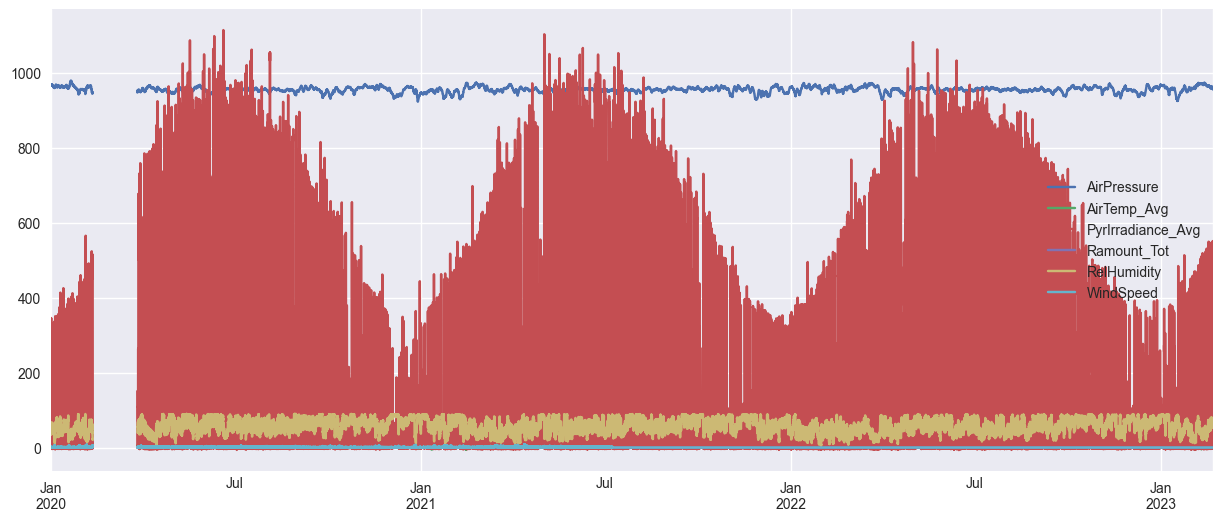

In [11]:
df_meteo.plot(figsize=(15, 6), alpha=0.8)

Visualize the data in df_meters

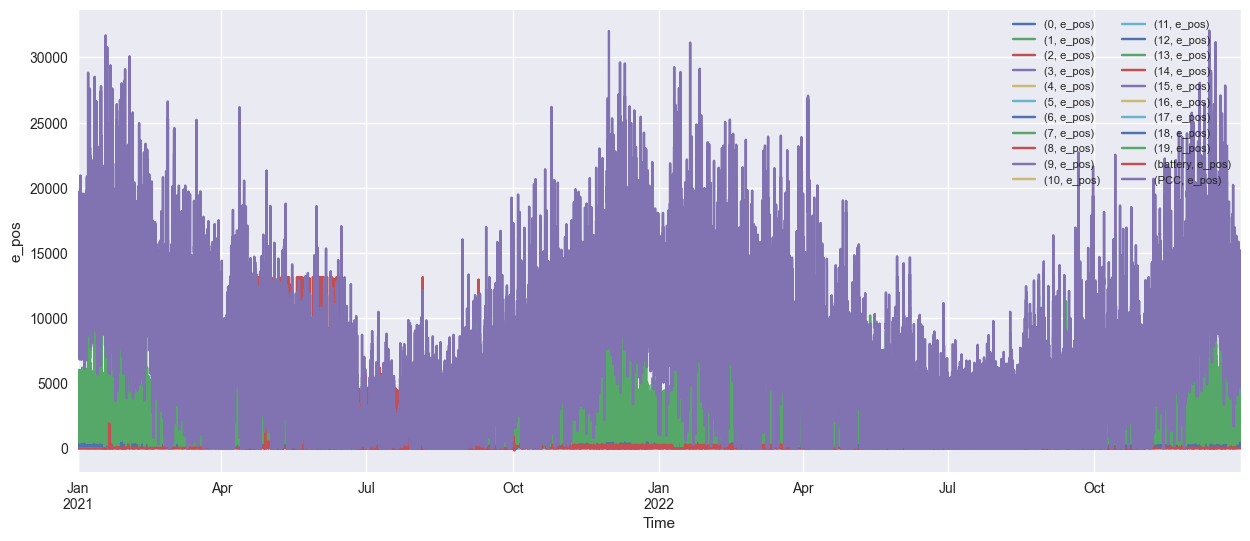

In [12]:
# Plot the e_pos measure in the df_meters dataset
e_pos_cols = [col for col in df_meters.columns if 'e_pos' in col]

# Plot the e_pos columns against the DataFrame's index
df_meters[e_pos_cols].plot(figsize=(15, 6), alpha=0.8)
plt.xlabel('Time')
plt.ylabel('e_pos')
plt.legend(loc='upper right', ncol=2, fontsize=8)
plt.show()

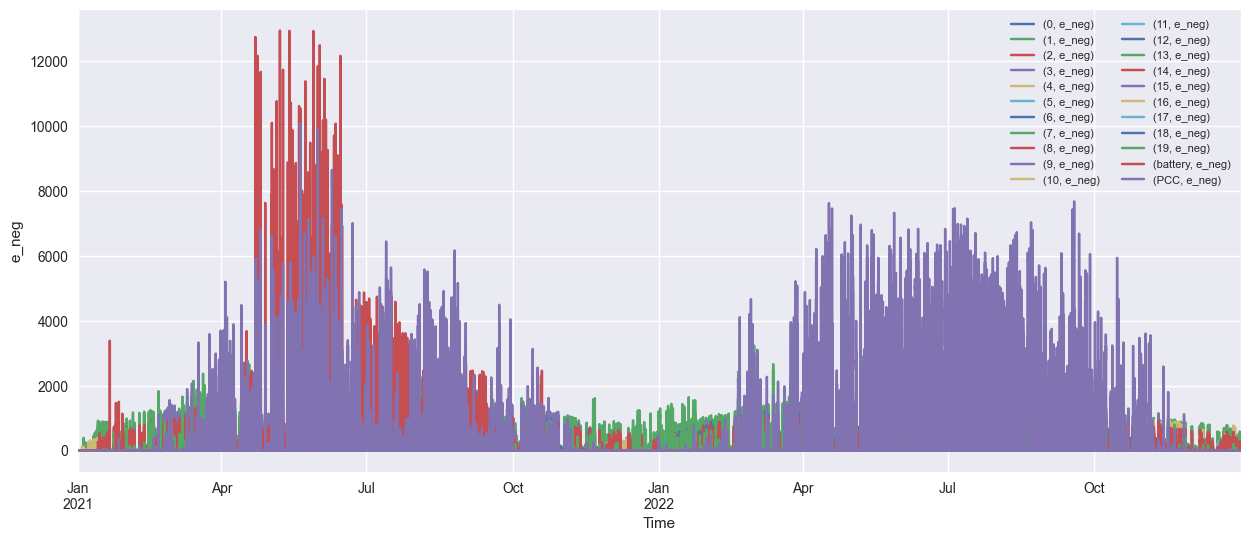

In [13]:
# Plot the e_neg measure in the df_meters dataset
e_neg_cols = [col for col in df_meters.columns if 'e_neg' in col]

# Plot the e_neg columns against the DataFrame's index
df_meters[e_neg_cols].plot(figsize=(15, 6), alpha=0.8)
plt.xlabel('Time')
plt.ylabel('e_neg')
plt.legend(loc='upper right', ncol=2, fontsize=8)
plt.show()

Visualize the data in df_nwp

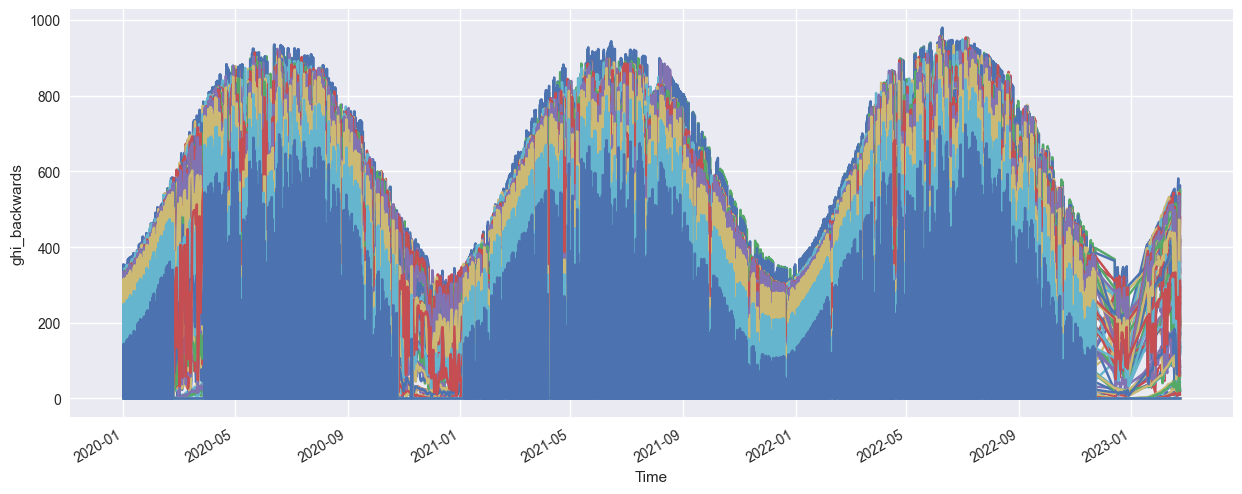

In [14]:
# Plot the ghi_backwards measure in the df_nwp dataset
e_ghi_cols = [col for col in df_nwp.columns if 'ghi_backwards' in col]

# Plot the ghi_backwards columns against the DataFrame's index
df_nwp[e_ghi_cols].plot(figsize=(15, 6), alpha=0.8)
plt.xlabel('Time')
plt.ylabel('ghi_backwards')
plt.legend('', frameon=False)
# plt.legend(loc='upper right', ncol=2, fontsize=8)  # Comment label due to size reasons
plt.show()

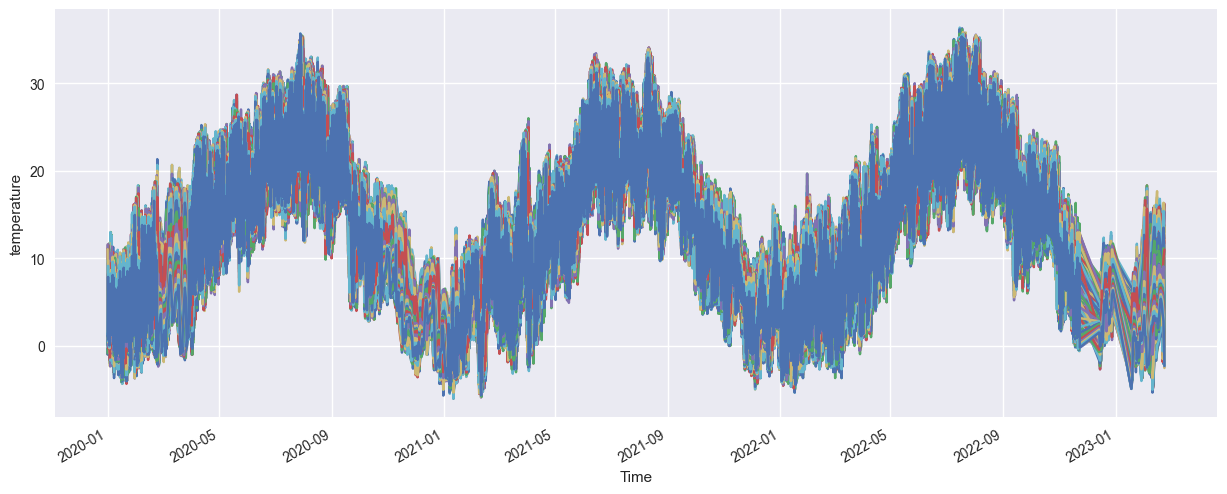

In [15]:
# Plot the temperature measure in the df_nwp dataset
e_temp_cols = [col for col in df_nwp.columns if 'temperature' in col]

# Plot the temperature columns against the DataFrame's index
df_nwp[e_temp_cols].plot(figsize=(15, 6), alpha=0.8)
plt.xlabel('Time')
plt.ylabel('temperature')
plt.legend('', frameon=False)
# plt.legend(loc='upper right', ncol=2, fontsize=8)  # Comment label due to size reasons
plt.show()

In [ ]:
df = df_meters.copy()
df[e_neg_cols] = -df[e_neg_cols]

df.plot(figsize=(15, 6), alpha=0.8)
plt.xlabel('Time')
plt.ylabel('e_neg')
plt.legend(loc='upper right', ncol=2, fontsize=8)
plt.show()

# Clean and Scale data (if needed)

Comments on the data after having explored it:
- It is requested to resample the data at hourly rate
- It is requested to sum-up the battery data to the PCC data as the energy stored in the battery, as there is a discrepancy with the meters data.

Resample the data at hourly rate

In [17]:
# Check data sampled at 15 minutes intervals
df_meters.head(3)

0            1            2            3        \
                           e_pos e_neg  e_pos e_neg  e_pos e_neg  e_pos e_neg   
2020-12-31 23:00:00+00:00  126.0   0.0  974.0   0.0  544.0   0.0  681.0   0.0   
2020-12-31 23:15:00+00:00  102.0   0.0  211.0   0.0  495.0   0.0  606.0   0.0   
2020-12-31 23:30:00+00:00  121.0   0.0  210.0   0.0  233.0   0.0  598.0   0.0   

                                    4        ...     17           18        \
                                e_pos e_neg  ...  e_pos e_neg  e_pos e_neg   
2020-12-31 23:00:00+00:00  142.000000   0.0  ...  670.0   0.0  808.0   0.0   
2020-12-31 23:15:00+00:00  663.000000   0.0  ...  525.0   0.0  513.0   0.0   
2020-12-31 23:30:00+00:00  437.167377   0.0  ...  499.0   0.0  436.0   0.0   

                               19       battery            PCC        
                            e_pos e_neg   e_pos e_neg    e_pos e_neg  
2020-12-31 23:00:00+00:00  1805.0   0.0     1.0   0.0   9142.0   0.0  
2020-12-31 23:15:00+00:00  3082.0   0.0     0.0   0.0  13330.0   0.0  
2020-12-31 23:30:00+00:00   881.0   0.0     1.0   0.0   9095.0   0.0  

[3 rows x 44 columns]

In [18]:
# Resample the data at hourly rate
df_meteo = df_meteo.resample('H').mean()
df_meters = df_meters.resample('H').mean()
df_nwp = df_nwp.resample('H').mean()

In [20]:
# Check data sampled at 1 hour intervals
df_meters.head(3)

0             1             2             3  \
                            e_pos e_neg   e_pos e_neg   e_pos e_neg   e_pos   
2020-12-31 23:00:00+00:00  111.75   0.0  421.50   0.0  430.25   0.0  627.25   
2021-01-01 00:00:00+00:00  121.25   0.0  202.50   0.0  465.50   0.0  617.25   
2021-01-01 01:00:00+00:00   54.50   0.0  358.25   0.0  419.75   0.0  582.50   

                                          4        ...      17            18  \
                          e_neg       e_pos e_neg  ...   e_pos e_neg   e_pos   
2020-12-31 23:00:00+00:00   0.0  407.245601   0.0  ...  597.25   0.0  529.75   
2021-01-01 00:00:00+00:00   0.0  361.395305   0.0  ...  829.25   0.0  496.00   
2021-01-01 01:00:00+00:00   0.0  329.359094   0.0  ...  847.50   0.0  409.75   

                                      19       battery             PCC        
                          e_neg    e_pos e_neg   e_pos e_neg     e_pos e_neg  
2020-12-31 23:00:00+00:00   0.0  1606.75   0.0    0.75   0.0  10236.75   0.0  
2021-01-01 00:00:00+00:00   0.0  1566.50   0.0    0.50   0.0   9468.25   0.0  
2021-01-01 01:00:00+00:00   0.0  1786.50   0.0    0.75   0.0  10036.25   0.0  

[3 rows x 44 columns]

Sum up the battery data to the PCC data

In [21]:
# Check PCC data
df_meters['PCC'].head(3)

,e_pos,e_neg
2020-12-31 23:00:00+00:00,10236.75,0.0
2021-01-01 00:00:00+00:00,9468.25,0.0
2021-01-01 01:00:00+00:00,10036.25,0.0


In [22]:
# Check battery data
df_meters['battery'].head(3)

,e_pos,e_neg
2020-12-31 23:00:00+00:00,0.75,0.0
2021-01-01 00:00:00+00:00,0.50,0.0
2021-01-01 01:00:00+00:00,0.75,0.0


In [23]:
# Duplicate the column PCC to then sum it up with the battery data
new_columns = pd.DataFrame(df_meters['PCC'].values, index=df_meters['PCC'].index, 
                           columns=[('PCC_batt', 'e_pos'), ('PCC_batt', 'e_neg')])
df_meters = pd.concat([df_meters, new_columns], axis=1)



In [24]:
# Check if the new 'PCC_batt' column was added
df_meters.columns[-5]


('battery', 'e_neg')

In [28]:
# Fortunately the data is aligned, so we can simply sum the features
# Sum up battery and PCC data
df_meters[('PCC_batt', 'e_pos')] += df_meters[('battery', 'e_pos')]
df_meters[('PCC_batt', 'e_neg')] += df_meters[('battery', 'e_neg')]

0             1             2             3  \
                            e_pos e_neg   e_pos e_neg   e_pos e_neg   e_pos   
2020-12-31 23:00:00+00:00  111.75   0.0  421.50   0.0  430.25   0.0  627.25   
2021-01-01 00:00:00+00:00  121.25   0.0  202.50   0.0  465.50   0.0  617.25   
2021-01-01 01:00:00+00:00   54.50   0.0  358.25   0.0  419.75   0.0  582.50   

                                          4        ...      18             19  \
                          e_neg       e_pos e_neg  ...   e_pos e_neg    e_pos   
2020-12-31 23:00:00+00:00   0.0  407.245601   0.0  ...  529.75   0.0  1606.75   
2021-01-01 00:00:00+00:00   0.0  361.395305   0.0  ...  496.00   0.0  1566.50   
2021-01-01 01:00:00+00:00   0.0  329.359094   0.0  ...  409.75   0.0  1786.50   

                                battery             PCC        PCC_batt        
                          e_neg   e_pos e_neg     e_pos e_neg     e_pos e_neg  
2020-12-31 23:00:00+00:00   0.0    0.75   0.0  10236.75   0.0  10237.50   0.0  
2021-01-01 00:00:00+00:00   0.0    0.50   0.0   9468.25   0.0   9468.75   0.0  
2021-01-01 01:00:00+00:00   0.0    0.75   0.0  10036.25   0.0  10037.00   0.0  

[3 rows x 46 columns]

In [36]:
 # Check that the sum was successful
df_meters[['PCC', 'battery', 'PCC_batt']].head(3)

# We'll keep the old columns 'PCC' and 'battery' in case we'll need them later

PCC       battery        PCC_batt      
                              e_pos e_neg   e_pos e_neg     e_pos e_neg
2020-12-31 23:00:00+00:00  10236.75   0.0    0.75   0.0  10237.50   0.0
2021-01-01 00:00:00+00:00   9468.25   0.0    0.50   0.0   9468.75   0.0
2021-01-01 01:00:00+00:00  10036.25   0.0    0.75   0.0  10037.00   0.0

Merge the datasets to get a single dataset with all the features.
Some data has different time windows, so there will be some NaN values.
We decided to drop the windows where we don't have data from all the features.

In [48]:
# Check the range of dates in the three datasets
print('Start date:\n',
      'df_meters:', df_meters.index.min(), '\n',
      'df_meteo:', df_meteo.index.min(), '\n',
      'df_nwp:', df_nwp.index.min(), '\n',
      '\n',
      'End date:\n',
      'df_meters:', df_meters.index.max(), '\n',
      'df_meteo:', df_meteo.index.max(), '\n',
      'df_nwp:', df_nwp.index.max())
      

Start date:
 df_meters: 2020-12-31 23:00:00+00:00 
 df_meteo: 2020-01-01 00:00:00+00:00 
 df_nwp: 2020-01-01 00:00:00+00:00 
 
 End date:
 df_meters: 2022-12-31 22:00:00+00:00 
 df_meteo: 2023-02-21 23:00:00+00:00 
 df_nwp: 2023-02-23 00:00:00+00:00


In [37]:
df = pd.concat([df_meters, df_meteo, df_nwp], axis=1)

In [41]:
df.shape

(27577, 559)

In [58]:
# Check for nulls in the datasets
print('df_meters:\n', df_meters.isna().sum(), '\n---------\n')

print('df_meteo:\n', df_meteo.isna().sum(), '\n---------\n')

print('df_nwp:\n', df_nwp.isna().sum(), '\n---------\n')

print('df:\n', df.isna().sum())

df_meters:
 0         e_pos     0
          e_neg     0
1         e_pos     0
          e_neg     0
2         e_pos     0
          e_neg     0
3         e_pos     0
          e_neg     0
4         e_pos     1
          e_neg     1
5         e_pos     0
          e_neg     0
6         e_pos     0
          e_neg     0
7         e_pos     0
          e_neg     0
8         e_pos     0
          e_neg     0
9         e_pos     0
          e_neg     0
10        e_pos     0
          e_neg     0
11        e_pos     0
          e_neg     0
12        e_pos     0
          e_neg     0
13        e_pos     0
          e_neg     0
14        e_pos     0
          e_neg     0
15        e_pos     0
          e_neg     0
16        e_pos     0
          e_neg     0
17        e_pos     0
          e_neg     0
18        e_pos    69
          e_neg    69
19        e_pos     0
          e_neg     0
battery   e_pos     5
          e_neg     5
PCC       e_pos     4
          e_neg     4
PCC_batt  e_pos     

In [57]:
df_nwp # Full of nulls, send help

ghi_backwards                                     \
                                    0    1       10   100  101  102    103   
2020-01-01 00:00:00+00:00           0.0  0.0  273.43  0.0  0.0  0.0   0.00   
2020-01-01 01:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
2020-01-01 02:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
2020-01-01 03:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
2020-01-01 04:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
...                                 ...  ...     ...  ...  ...  ...    ...   
2023-02-22 20:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
2023-02-22 21:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
2023-02-22 22:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
2023-02-22 23:00:00+00:00           NaN  NaN     NaN  NaN  NaN  NaN    NaN   
2023-02-23 00:00:00+00:00           0.0  0.0  420.29  0.0  0.0  0.0  15.24   

                                                  ... temperature              \
                             104     105     106  ...         90    91    92    
2020-01-01 00:00:00+00:00  26.58  127.41  234.86  ...        5.27  4.30  3.57   
2020-01-01 01:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
2020-01-01 02:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
2020-01-01 03:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
2020-01-01 04:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
...                          ...     ...     ...  ...         ...   ...   ...   
2023-02-22 20:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
2023-02-22 21:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
2023-02-22 22:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
2023-02-22 23:00:00+00:00    NaN     NaN     NaN  ...         NaN   NaN   NaN   
2023-02-23 00:00:00+00:00  82.81  168.08  234.96  ...        0.54 -0.08 -0.52   

                                                                     
                            93    94    95    96    97    98    99   
2020-01-01 00:00:00+00:00  3.00  2.57  2.21  1.88  1.59  1.32  1.08  
2020-01-01 01:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2020-01-01 02:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2020-01-01 03:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2020-01-01 04:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...                         ...   ...   ...   ...   ...   ...   ...  
2023-02-22 20:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-02-22 21:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-02-22 22:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-02-22 23:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-02-23 00:00:00+00:00 -0.88 -1.30 -1.69 -1.94 -2.06 -2.17 -2.29  

[27577 rows x 507 columns]

In [42]:
trial = df.dropna()

In [43]:
trial.shape

(1349, 559)

# Feature Selection (if needed)

# Models building

- It is a good idea to train one model for the prediction on the data in ec_meters and another model for PCC as it has a different scale. Otherwise, 21 model (20 stations + PCC) could be made, but it is unnecessary and time consuming.
- Add some base line models

# Model selection